In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
colunas = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO','Q001','Q002']

In [31]:
df = pd.read_csv('MICRODADOS_ENEM_2018.csv', sep=";", encoding='ISO-8859-1', usecols=colunas, nrows=10000)

In [32]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002
0,180007186625,2018,2,F,0.0,4,1,2,0,4,...,496.3,1.0,120.0,40.0,40.0,120.0,40.0,360.0,E,E
1,180007186627,2018,3,F,0.0,4,1,1,1,1,...,440.6,1.0,140.0,40.0,40.0,160.0,40.0,420.0,D,E
2,180007186628,2018,3,M,0.0,0,1,2,0,2,...,410.4,1.0,120.0,120.0,100.0,120.0,140.0,600.0,B,B
3,180007186629,2018,2,F,0.0,3,1,2,0,4,...,711.5,1.0,160.0,160.0,180.0,180.0,120.0,800.0,F,F
4,180007186631,2018,11,F,0.0,5,1,1,6,1,...,543.1,1.0,120.0,120.0,120.0,100.0,40.0,500.0,A,E


In [40]:
# Selecionar apenas as colunas que interessam
colunasSel = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002','SG_UF_PROVA']

In [41]:
df = df.filter(items=colunasSel)

In [42]:
df.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_PROVA
0,180007186625,496.3,360.0,E,E,PA
1,180007186627,440.6,420.0,D,E,PA
2,180007186628,410.4,600.0,B,B,MG
3,180007186629,711.5,800.0,F,F,PA
4,180007186631,543.1,500.0,A,E,PE


In [16]:
# Q001 - Até que série seu pai, ou o homem responsável por você, estudou?
# Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

In [43]:
# Criar um dicionário para visualizar melhor o resultado.
dict1 = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental , mas não completou o Ensino Médio',
    'E': 'Completou o ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-Graduação',
    'G': 'Completou a Pós-Graduação',
    'H': 'Não sei'
}

In [44]:
# Inserindo coluna NO_Q001
df['NO_Q001'] = [dict1[resp] for resp in df.Q001]

In [47]:
# Inserindo coluna NO_Q002
df['NO_Q002'] = [dict1[resp] for resp in df.Q002]

In [48]:
df.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_PROVA,NO_Q001,NO_Q002
0,180007186625,496.3,360.0,E,E,PA,"Completou o ensino Médio, mas não completou a ...","Completou o ensino Médio, mas não completou a ..."
1,180007186627,440.6,420.0,D,E,PA,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o ensino Médio, mas não completou a ..."
2,180007186628,410.4,600.0,B,B,MG,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
3,180007186629,711.5,800.0,F,F,PA,"Completou a Faculdade, mas não completou a Pós...","Completou a Faculdade, mas não completou a Pós..."
4,180007186631,543.1,500.0,A,E,PE,Nunca estudou,"Completou o ensino Médio, mas não completou a ..."


In [66]:
df.filter(items=['NU_NOTA_REDACAO','NO_Q002'])\
  .where(df.SG_UF_PROVA == 'RJ')\
  .groupby('NO_Q002')\
  .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-Graduação,720.555556
"Completou a Faculdade, mas não completou a Pós-Graduação",627.843137
"Completou o ensino Médio, mas não completou a Faculdade",568.918919
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",533.478261
Não completou a 4ª série/5º ano do Ensino Fundamental,517.142857
"Completou a 8ª série/9º ano do Ensino Fundamental , mas não completou o Ensino Médio",516.739130
Não sei,427.142857
Nunca estudou,408.571429


In [67]:
df.filter(items=['SG_UF_PROVA','NU_NOTA_REDACAO','NO_Q002'])\
  .groupby(['SG_UF_PROVA','NO_Q002'])\
  .mean()

NU_NOTA_REDACAO
SG_UF_PROVA NO_Q002                                                            
AC          Completou a 4ª série/5º ano, mas não completou ...       505.000000
            Completou a 8ª série/9º ano do Ensino Fundament...       567.500000
            Completou a Faculdade, mas não completou a Pós-...       380.000000
            Completou a Pós-Graduação                                475.000000
            Completou o ensino Médio, mas não completou a F...       576.666667
...                                                                         ...
TO          Completou a Pós-Graduação                                517.142857
            Completou o ensino Médio, mas não completou a F...       552.413793
            Nunca estudou                                            433.333333
            Não completou a 4ª série/5º ano do Ensino Funda...       547.500000
            Não sei                                                  440.000000

[214 rows x 1 columns]

<Axes: xlabel='Q002'>

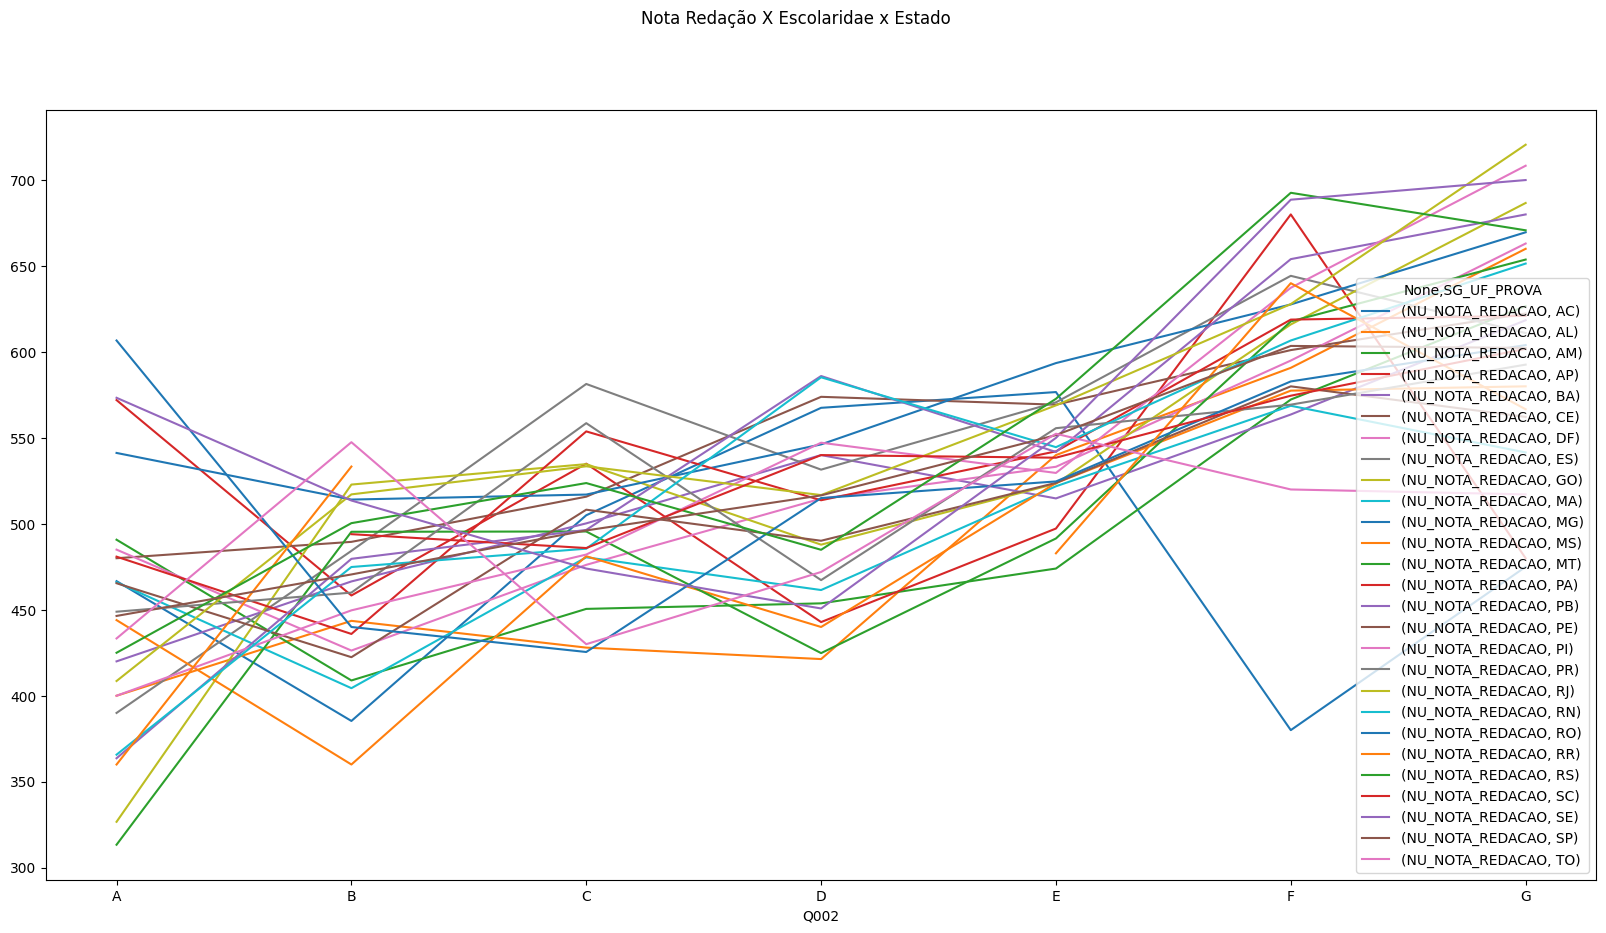

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
plt.suptitle('Nota Redação X Escolaridae x Estado')

df.filter(items=['SG_UF_PROVA','NU_NOTA_REDACAO','Q002'])\
  .where(df.Q002 != 'H')\
  .groupby(['Q002','SG_UF_PROVA'])\
  .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
  .unstack().plot(ax= ax, )
